In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import numpy as np
import matplotlib.pyplot as plt
fig_width = 12
%matplotlib inline

In [2]:
import bayesianchangepoint as bcp



## performing inference: application to experimental data


get https://github.com/chloepasturel/AnticipatorySPEM


In [3]:

seed = 42
np.random.seed(seed)

N_blocks = 3
seed = 51 #119 #2017
N_trials = 200
tau = N_trials/5.
(trials, p) = bcp.switching_binomial_motion(N_trials=N_trials, N_blocks=N_blocks, tau=tau, seed=seed)


In [4]:
i_block = 0
print('occurrences=', p[:, i_block, 0])
print('p=', p[:, i_block, 1])
print('switches=', p[:, i_block, -1])

occurrences= [0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1.]
p= [0.64752352 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352
 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352
 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352
 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352
 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352
 0.64752352 0.64752352 0.64752352 0.647

In [5]:
#N_trials = a.exp['N_trials']
h = 1./tau # a.exp['tau']
print('this experiment uses', N_trials, 'trials and a switch rate of h=', h, '(that is, one switch every', 1/h, 'trials on average)')

this experiment uses 200 trials and a switch rate of h= 0.025 (that is, one switch every 40.0 trials on average)


i_block= 0


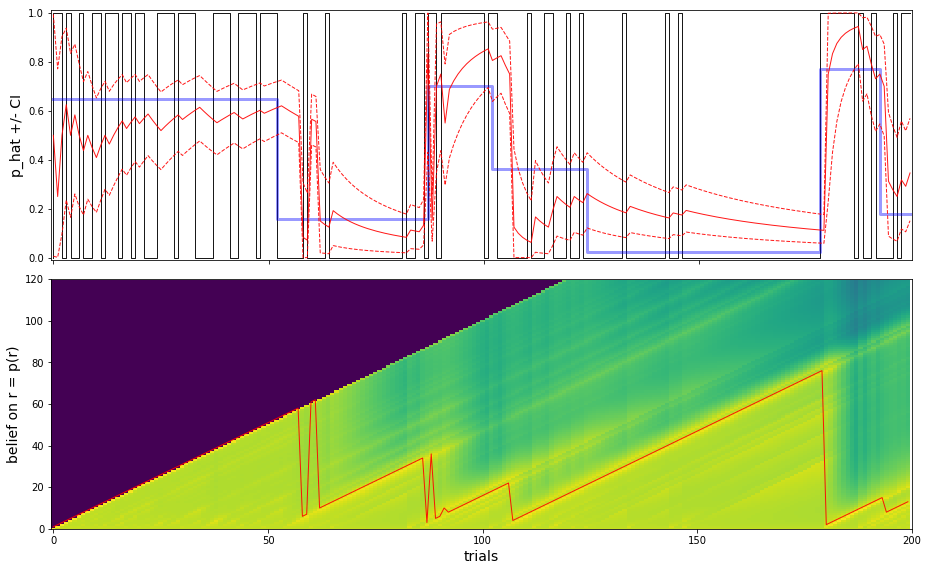

i_block= 1


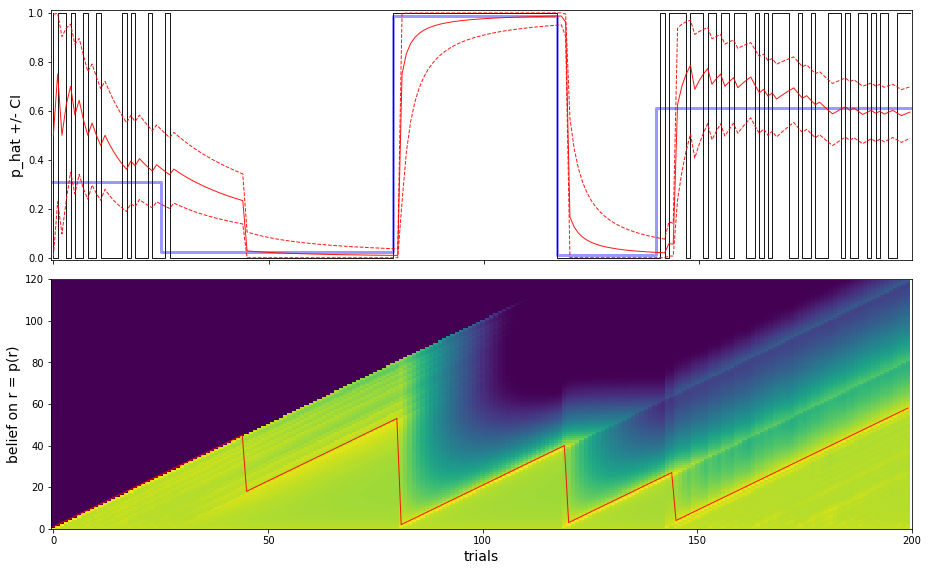

i_block= 2


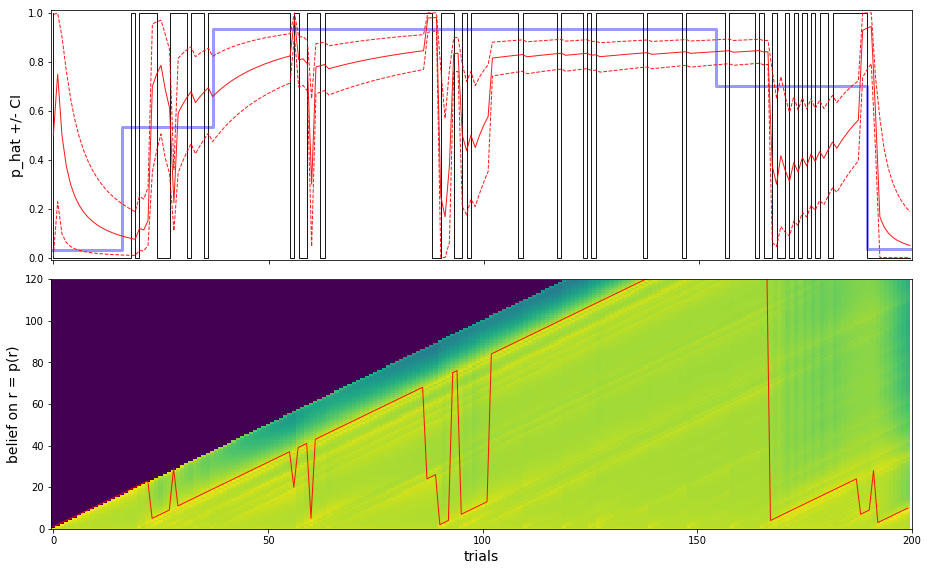

In [6]:
for i_block in range(3):
    print('i_block=', i_block)
    o = p[:, i_block, 0]
    p_bar, r, beliefs = bcp.inference(o, h=h, p0=.5)
    fig, axs = bcp.plot_inference(p[:, i_block, 0], p[:, i_block, 1], p_bar, r, beliefs, eps=1e-18)
    plt.show()

In [7]:
t = 1
np.arange(0, t+1)

array([0, 1])

In [8]:
N_trials=200
np.linspace(0, N_trials, 5, endpoint=True)

array([  0.,  50., 100., 150., 200.])

In [9]:

p_bar[0:1, 0], r[0:1, 0]

(array([0.5]), array([1.]))

In [10]:

p_bar[0:2, 1], r[0:2, 1]

(array([0.5 , 0.75]), array([1., 2.]))

In [11]:
p_hat

NameError: name 'p_hat' is not defined

In [ ]:
p_hat, r_hat = bcp.readout(p_bar, r, beliefs, mode='expectation')
p_hat, p[:, i_block, 1]

In [ ]:
np.mean(np.abs(p_hat - p[:, i_block, 1]))